In [ ]:
# colab설정

from google.colab import drive
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score, auc


drive.mount('/content/drive')
path = '/content/drive/MyDrive/black_swan_physionet/'
os.chdir(path)

# file = 'physionet2012_test.csv'
file2 = 'physionet_test_data_all_model_pred.csv'

# test_original_df = pd.read_csv(path+file)
test_df = pd.read_csv(path+file2)

# maxlen = len(train_df[train_df['pid'] == train_df['pid'][0]])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Jupyter Notebook 설정

# import os 
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sen
# %matplotlib inline
# import numpy as np
# from sklearn.metrics import roc_curve, roc_auc_score, auc


# path = '/Users/jsha/gjai/final_project/black_swan_physionet/'

# file = 'physionet2012_test.csv'
# file2 = 'physionet_test_data_all_model_pred.csv'

# test_original_df = pd.read_csv(path+file)
# test_df_all_data = pd.read_csv(path+file2)

In [ ]:
test_df

,pid,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,...,ICUType_2.0,ICUType_3.0,ICUType_4.0,api_model_pred,bidirec_model_pred,cnn_model_pred,lstm_model_pred,simple_model_pred,models_mean_pred,ICUType
0,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0.281910,0.242593,0.308481,0.309540,0.243371,0.277179,3.0
1,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0.281910,0.242593,0.308481,0.309540,0.243371,0.277179,3.0
2,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0.281910,0.242593,0.308481,0.309540,0.243371,0.277179,3.0
3,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0.281910,0.242593,0.308481,0.309540,0.243371,0.277179,3.0
4,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0.281910,0.242593,0.308481,0.309540,0.243371,0.277179,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,135219.0,78.0,0.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,...,0,0,1,0.042132,0.082701,0.138992,0.164714,0.039900,0.093688,4.0
27996,135219.0,78.0,0.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,...,0,0,1,0.042132,0.082701,0.138992,0.164714,0.039900,0.093688,4.0
27997,135219.0,78.0,0.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,...,0,0,1,0.042132,0.082701,0.138992,0.164714,0.039900,0.093688,4.0
27998,135219.0,78.0,0.0,85.0,45.0,72.0,2.9,14.0,0.8,143.5,...,0,0,1,0.042132,0.082701,0.138992,0.164714,0.039900,0.093688,4.0


['api_model_pred', 'bidirec_model_pred', 'cnn_model_pred', 'lstm_model_pred', 'simple_model_pred', 'models_mean_pred']
auc: 0.8425618921308576
[0.         0.01923077 0.09615385 0.09328028 0.13174182 0.12886826
 0.14809903 0.1423519  0.18081344 0.16931919 0.18854996 0.18567639
 0.20490716 0.2020336  0.27895668 0.26746242 0.28669319 0.2780725
 0.31653404 0.31078691 0.33001768 0.3127763  0.33200707 0.32913351
 0.34836428 0.34549072 0.36472149 0.3561008  0.37533156 0.372458
 0.39168877 0.3658267  0.38505747 0.38218391 0.40141468 0.37842617
 0.39765694 0.38328912 0.40251989 0.38815208 0.42661362 0.39500442
 0.43346596 0.4305924  0.44982317 0.44407604 0.46330681 0.44319187
 0.46242263 0.45954907 0.47877984 0.45291777 0.51061008 0.50773652
 0.52696729 0.5183466  0.53757737 0.52608311 0.54531388 0.53094607
 0.55017683 0.50994695 0.52917772 0.51193634 0.53116711 0.49381079
 0.53227233 0.48916888 0.50839965 0.47966401 0.49889478 0.47015915
 0.48938992 0.4750221  0.49425287 0.        ]


0.27

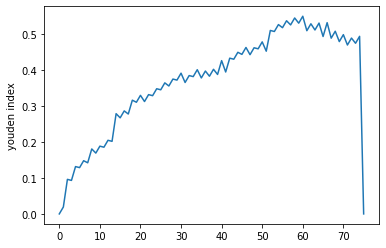

In [ ]:
# cuoff 찾기
pred_list = [pred for pred in test_df.columns if pred.endswith('_pred')]
print(pred_list)

fpr, tpr, thr = roc_curve(test_df.labels, test_df.cnn_model_pred)
print(f'auc: {auc(fpr, tpr)}')

youden_idx = tpr + 1 - fpr - 1

plt.plot(range(len(thr)), youden_idx)
plt.ylabel('youden index')
print(youden_idx)

cutoff = thr[np.argmax(youden_idx)]
cutoff = round(cutoff, 2)
cutoff

In [ ]:
pred_positive_df = test_df.query('cnn_model_pred>=@cutoff')
pred_negative_df = test_df.query('cnn_model_pred<@cutoff')

pred_TPR_df = test_df.query('cnn_model_pred>=@cutoff and labels==1')
pred_FPR_df = test_df.query('cnn_model_pred>=@cutoff and labels==0')
pred_TNR_df = test_df.query('cnn_model_pred<@cutoff and labels==0')
pred_FNR_df = test_df.query('cnn_model_pred<@cutoff and labels==1')

## 1. model의 positive와 negative 예측 분리 적용

In [ ]:
pred_posi_df = pred_positive_df.groupby(by='pid').max()
pred_nega_df = pred_negative_df.groupby(by='pid').max()

pred_posi_df

,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,...,ICUType_2.0,ICUType_3.0,ICUType_4.0,api_model_pred,bidirec_model_pred,cnn_model_pred,lstm_model_pred,simple_model_pred,models_mean_pred,ICUType
pid,,,,,,,,,,,,,,,,,,,,,
132551.0,78.0,0.0,85.0,46.0,82.0,2.9,81.0,0.8,143.5,1.0,...,0,1,0,0.384707,0.343585,0.477857,0.452556,0.382189,0.408179,3.0
132570.0,84.0,1.0,85.0,45.0,72.0,2.9,89.0,0.8,143.5,3.6,...,0,0,0,0.325288,0.304598,0.327413,0.340888,0.207096,0.301057,1.0
132582.0,84.0,1.0,85.0,45.0,72.0,2.9,32.0,0.8,143.5,1.1,...,0,1,0,0.276624,0.216460,0.300088,0.266338,0.252363,0.262374,3.0
132598.0,80.0,0.0,85.0,45.0,72.0,2.9,30.0,0.8,143.5,1.0,...,0,0,1,0.391472,0.475191,0.511146,0.498232,0.543960,0.484000,4.0
132610.0,72.0,1.0,85.0,45.0,72.0,2.9,68.0,0.8,143.5,1.0,...,0,1,0,0.281222,0.233951,0.324679,0.300477,0.283548,0.284775,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142400.0,68.0,0.0,89.0,45.0,101.0,3.6,20.0,1.7,143.5,1.0,...,0,0,1,0.202396,0.277268,0.434308,0.410893,0.303593,0.325691,4.0
142405.0,50.0,1.0,85.0,45.0,72.0,2.9,50.0,0.8,143.5,5.8,...,0,0,0,0.249433,0.190394,0.273704,0.255201,0.172170,0.228181,1.0
142527.0,76.0,1.0,85.0,45.0,72.0,3.3,101.0,0.8,143.5,1.3,...,0,1,0,0.339834,0.212583,0.368186,0.223227,0.181047,0.264976,3.0


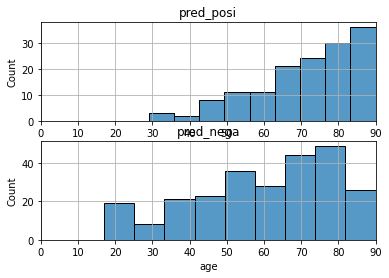

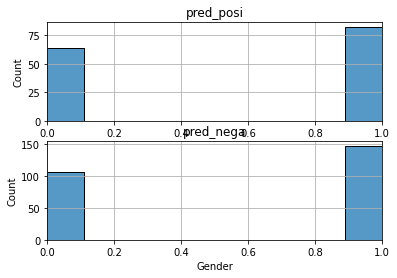

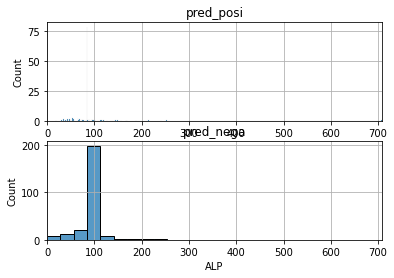

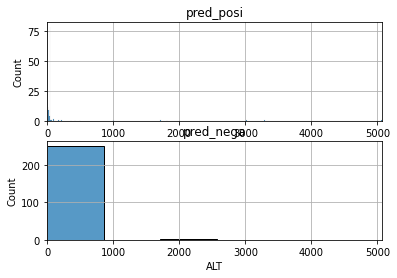

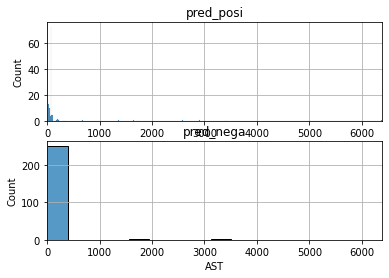

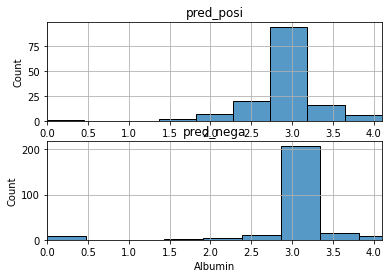

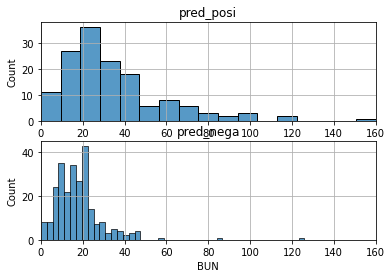

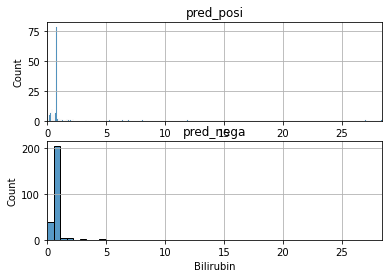

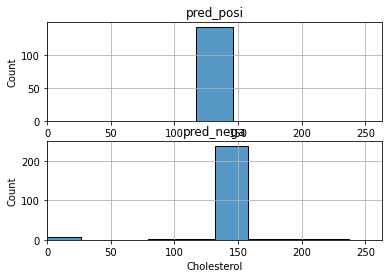

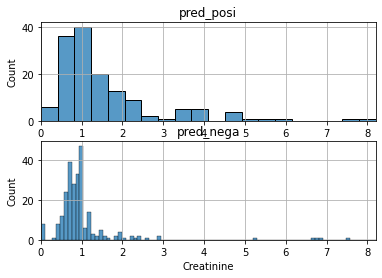

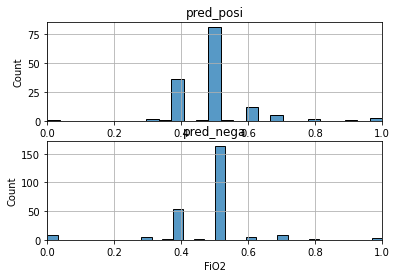

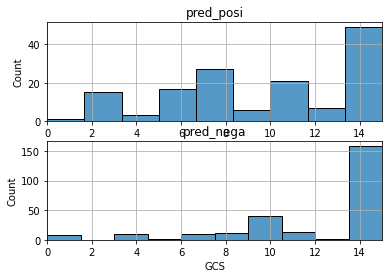

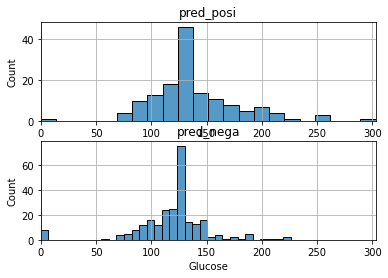

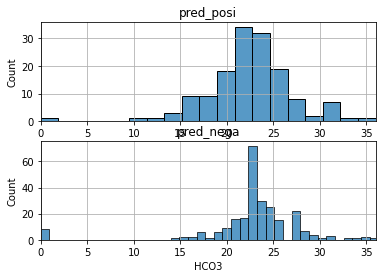

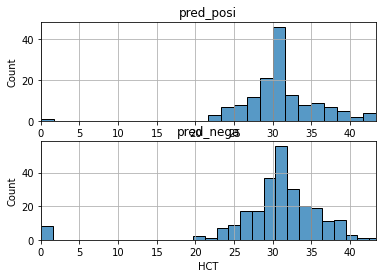

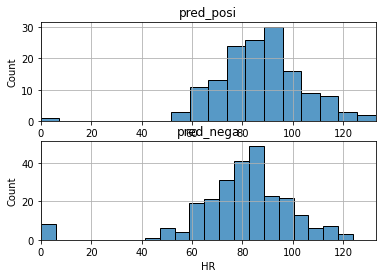

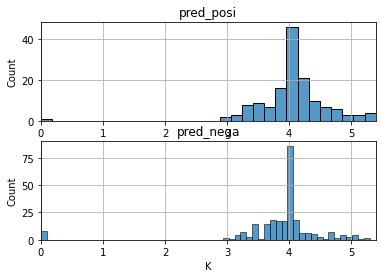

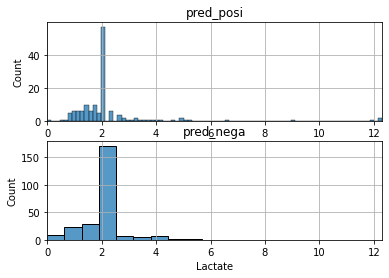

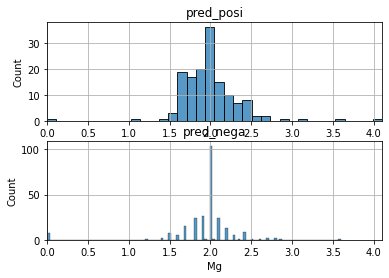

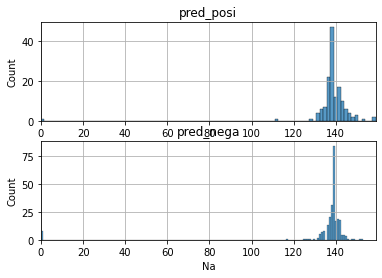

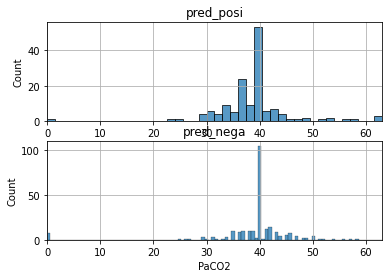

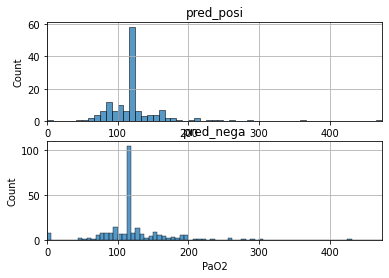

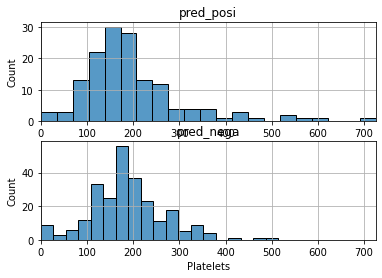

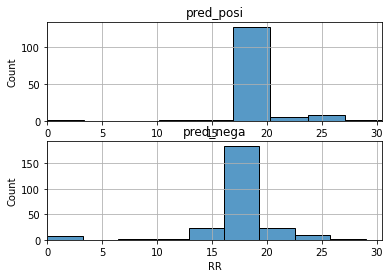

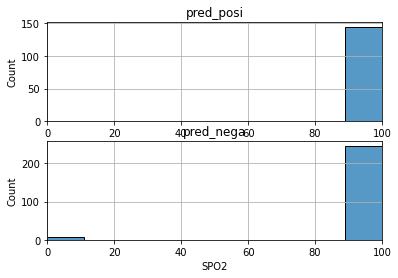

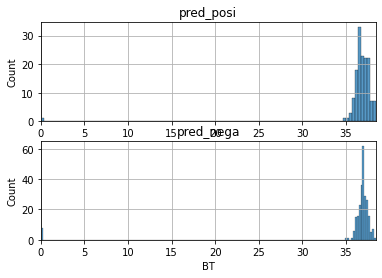

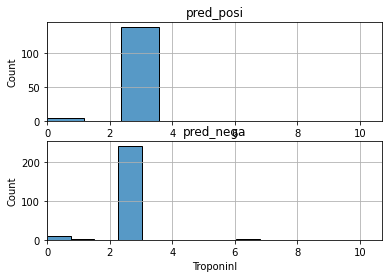

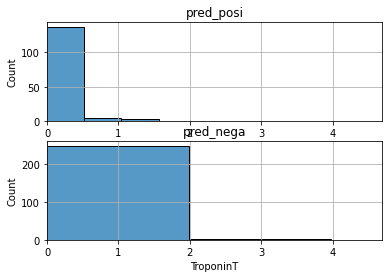

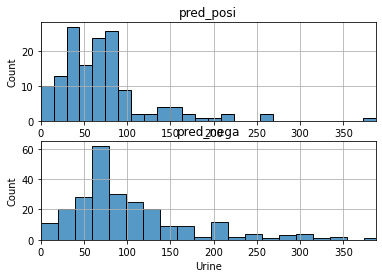

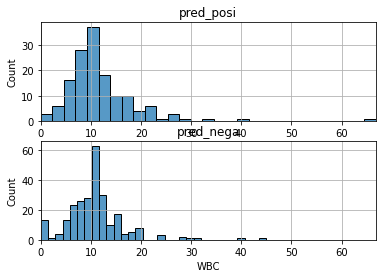

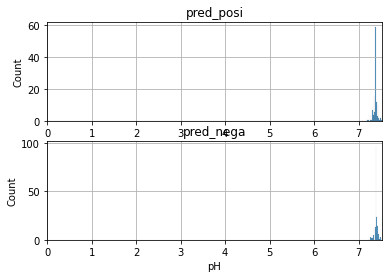

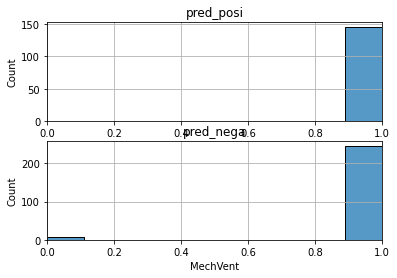

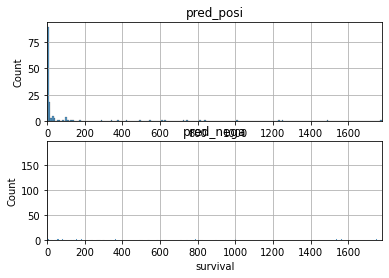

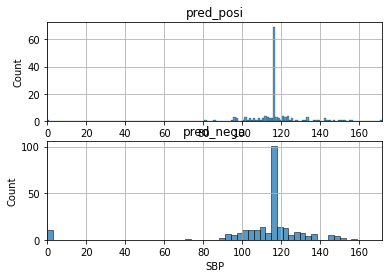

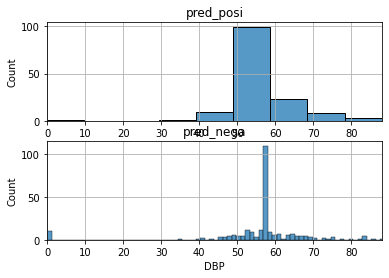

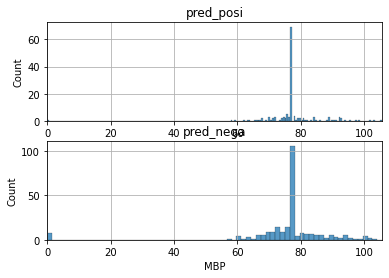

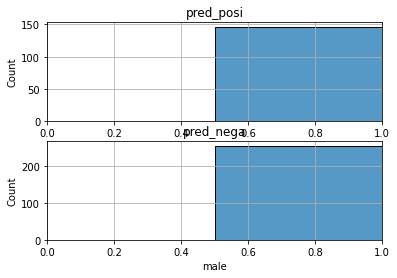

<ipython-input-39-ba647c65abca>:16: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[0].set_xlim([0, xlimit])
<ipython-input-39-ba647c65abca>:17: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[1].set_xlim([0, xlimit])


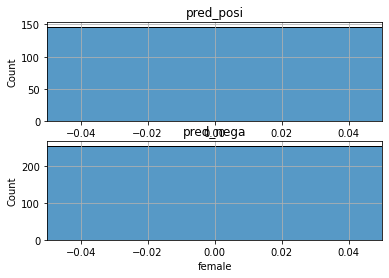

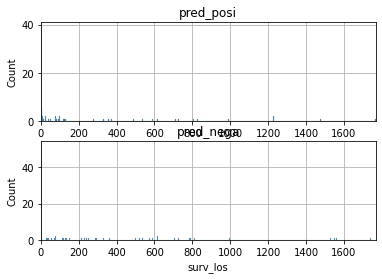

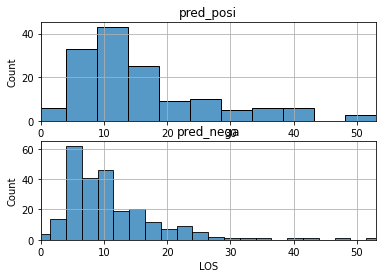

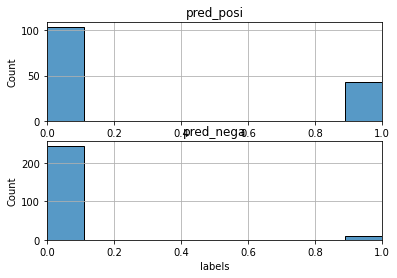

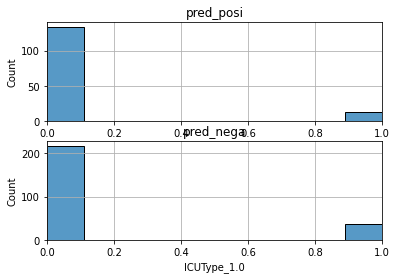

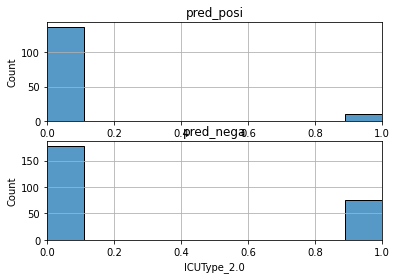

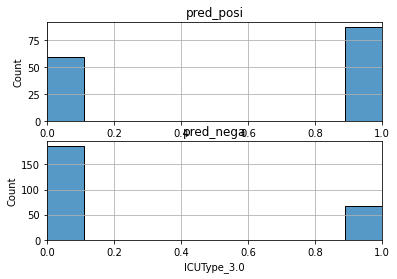

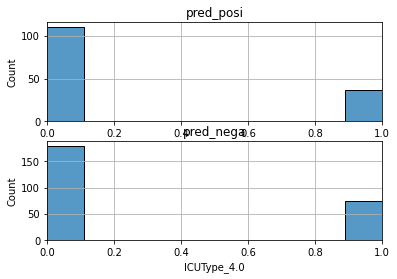

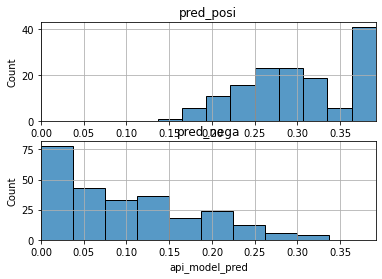

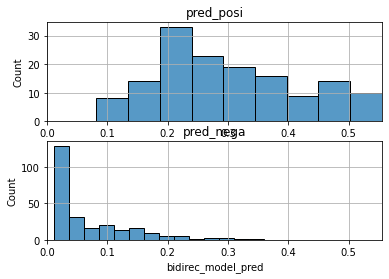

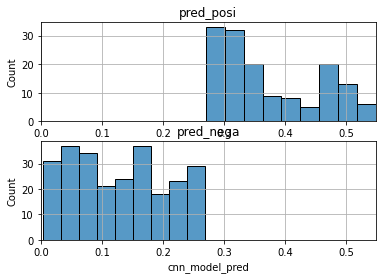

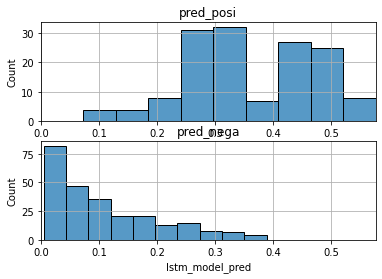

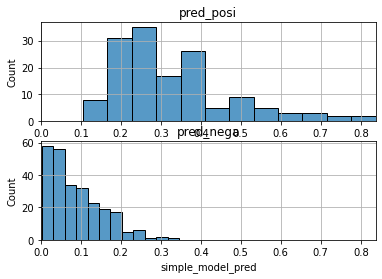

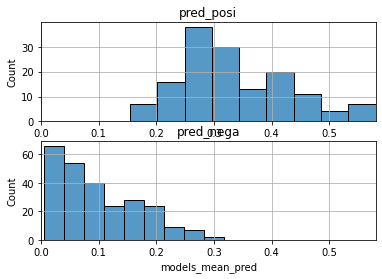

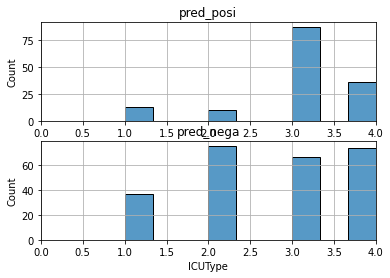

In [ ]:
pred_posi_df = pred_positive_df.groupby(by='pid').median()
pred_nega_df = pred_negative_df.groupby(by='pid').median()

pred_posi_df

for col in pred_posi_df.columns:
    fig, ax = plt.subplots(2, 1)
    sns.histplot(pred_posi_df[col], ax=ax[0])
    ax[0].set_title('pred_posi')
    ax[0].grid()
    sns.histplot(pred_nega_df[col], ax=ax[1])
    ax[1].set_title('pred_nega')
    ax[1].grid()

    xlimit = pred_posi_df[col].max()
    ax[0].set_xlim([0, xlimit])
    ax[1].set_xlim([0, xlimit])

    plt.show()


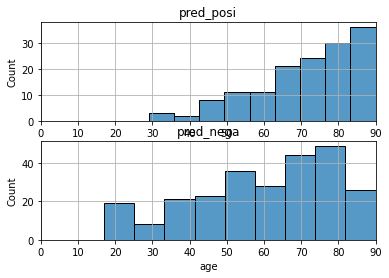

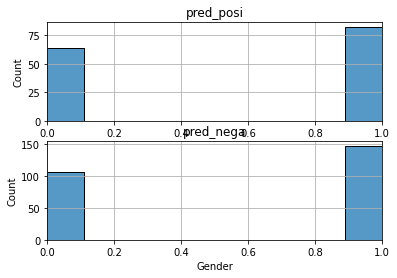

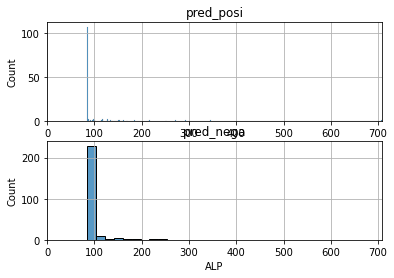

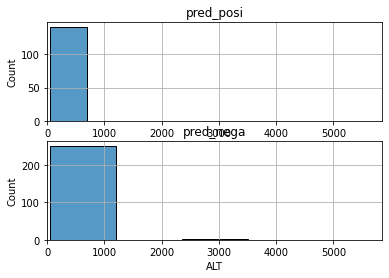

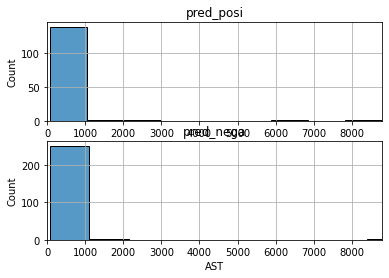

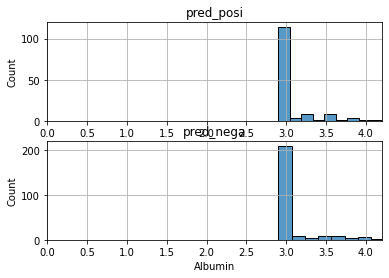

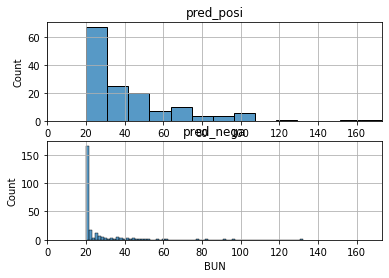

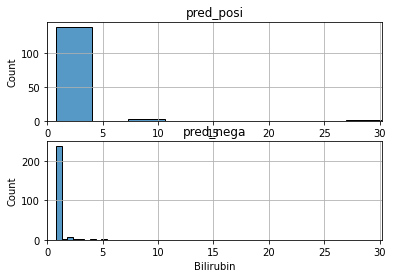

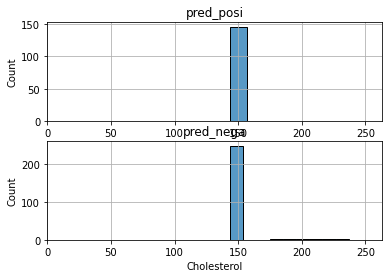

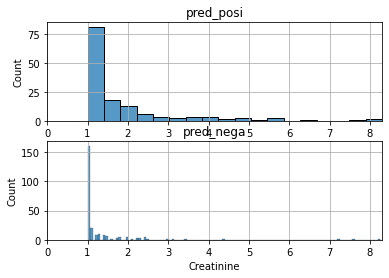

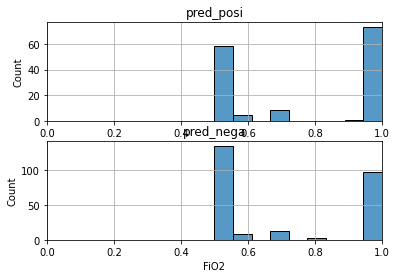

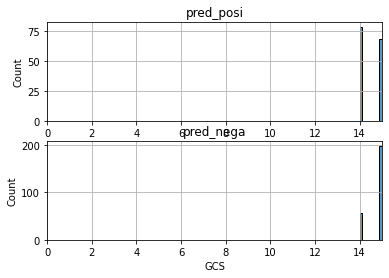

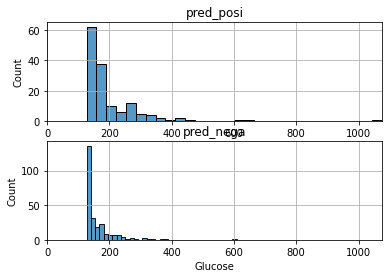

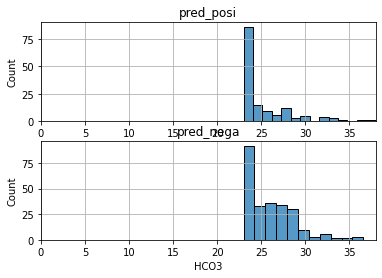

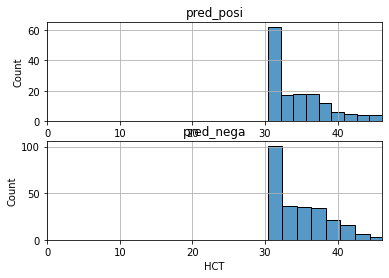

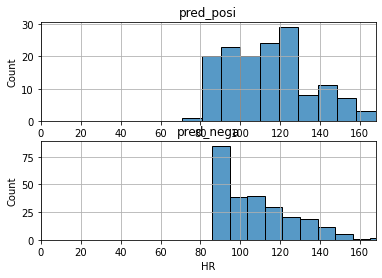

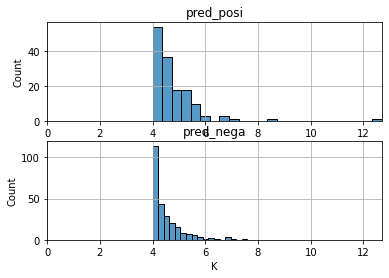

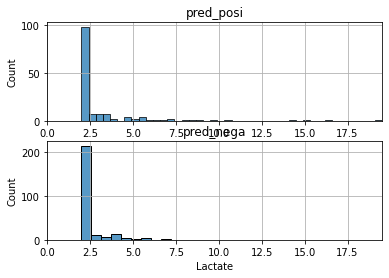

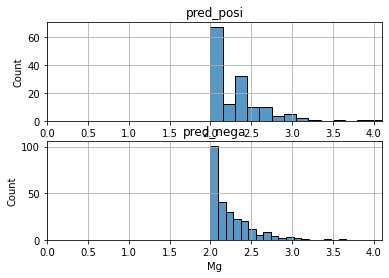

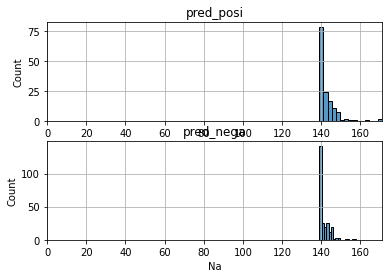

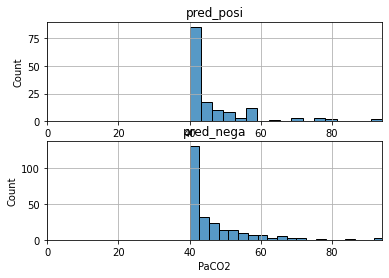

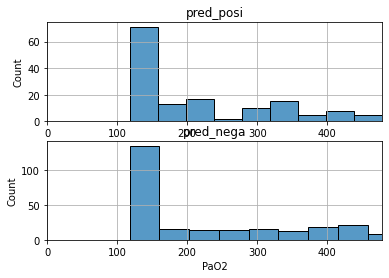

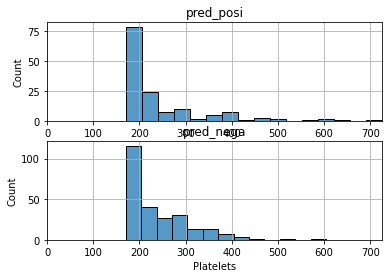

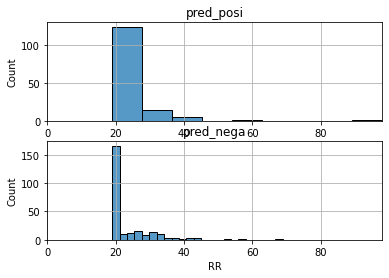

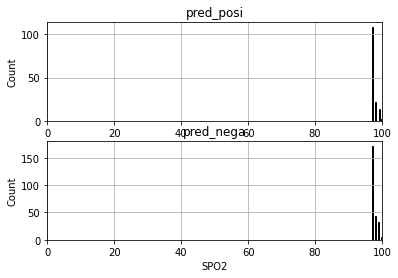

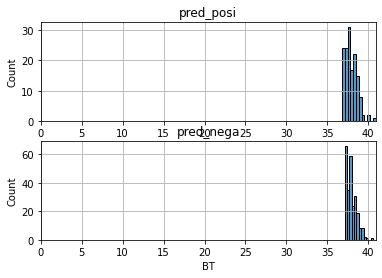

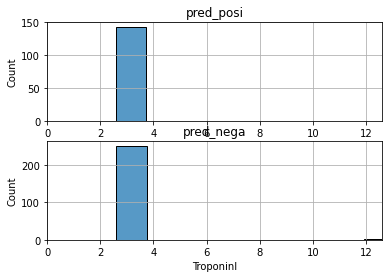

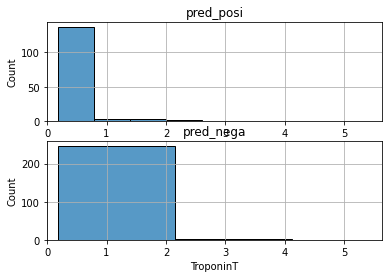

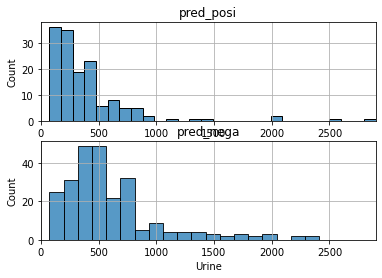

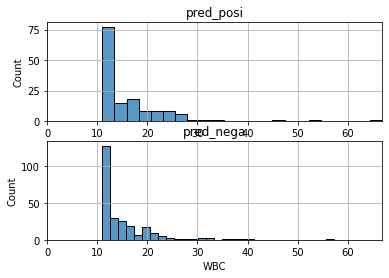

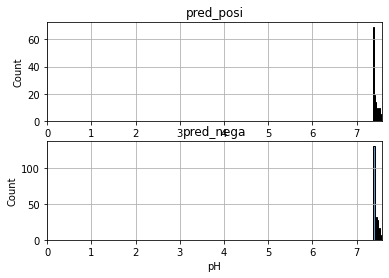

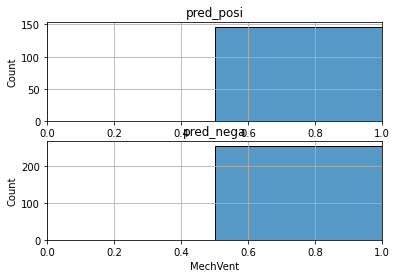

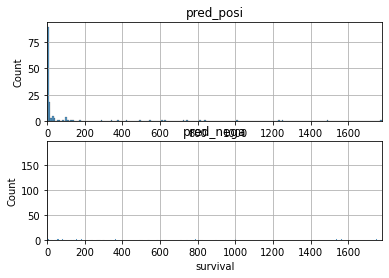

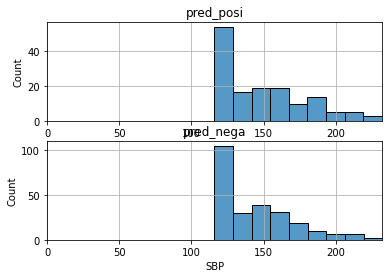

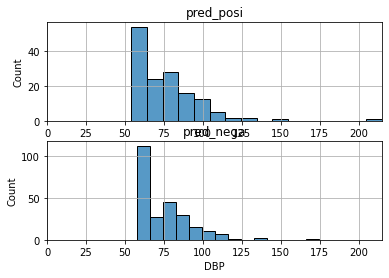

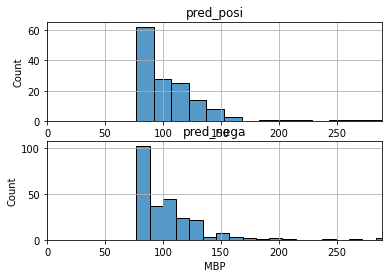

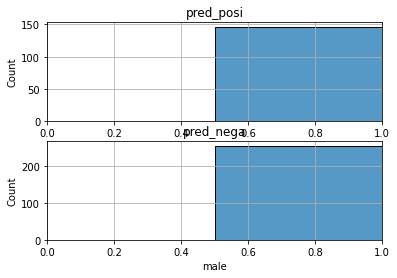

<ipython-input-38-ced81e111a1f>:16: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[0].set_xlim([0, xlimit])
<ipython-input-38-ced81e111a1f>:17: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[1].set_xlim([0, xlimit])


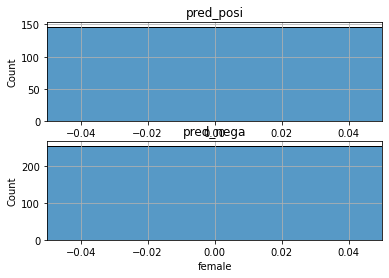

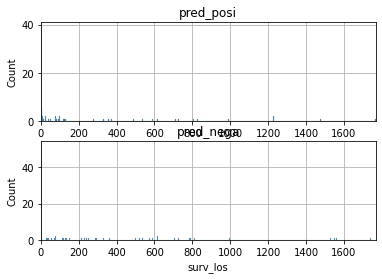

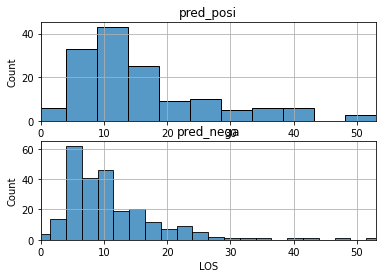

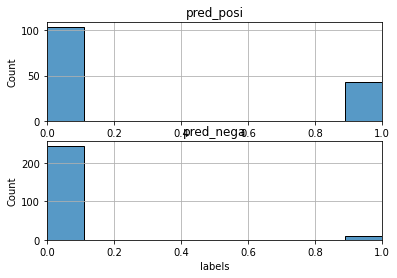

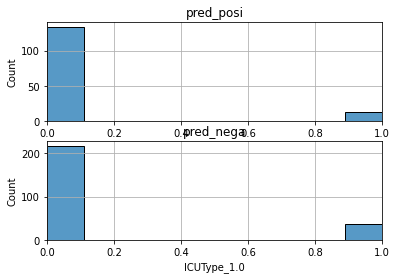

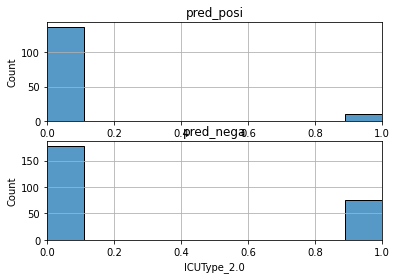

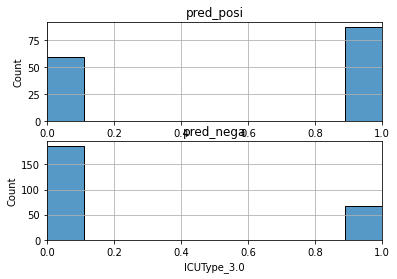

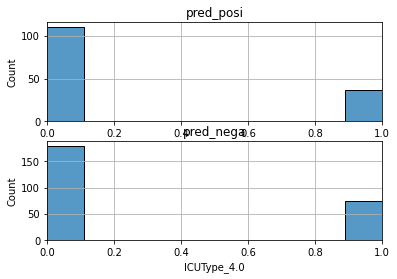

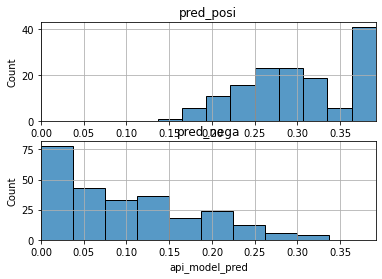

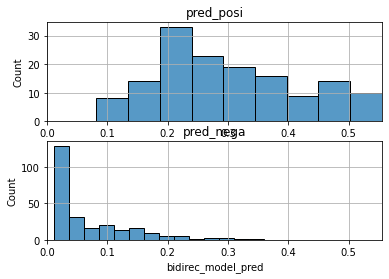

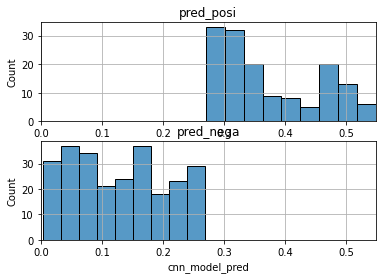

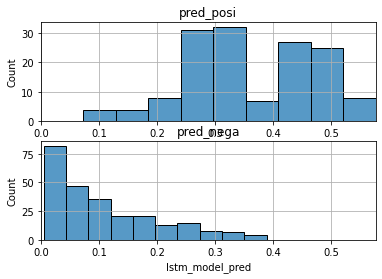

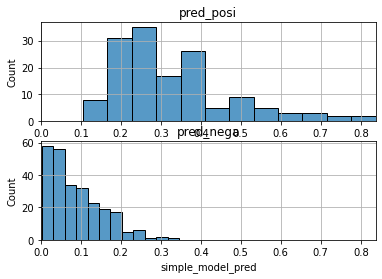

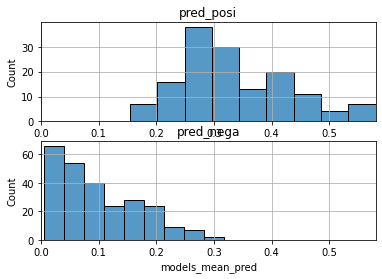

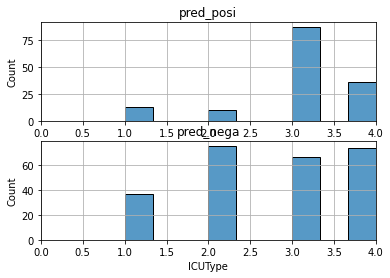

In [ ]:
pred_posi_df = pred_positive_df.groupby(by='pid').max()
pred_nega_df = pred_negative_df.groupby(by='pid').max()

pred_posi_df

for col in pred_posi_df.columns:
    fig, ax = plt.subplots(2, 1)
    sns.histplot(pred_posi_df[col], ax=ax[0])
    ax[0].set_title('pred_posi')
    ax[0].grid()
    sns.histplot(pred_nega_df[col], ax=ax[1])
    ax[1].set_title('pred_nega')
    ax[1].grid()

    xlimit = pred_posi_df[col].max()
    ax[0].set_xlim([0, xlimit])
    ax[1].set_xlim([0, xlimit])

    plt.show()


## 모델의 positive, negative 예측을 나누고, 다시 icutype별로 분류
- icu3: 4개 case 중 posi 예측이 월등히 가장 높고, nega 예측이 평균적. 환자수가 가장 많았겠지만, Positive, Negative 비율이 비슷한 특징. 4개 case중 생사여부에 덜 민감한 icutype
- icu2: 4개 case 중 posi 예측이 가장 낮고, nega 예측이 가장 높음. 생사여부에서 4개 case 중 가장 극단을 달리는 case. 
- icu 4개 모두, 전반적으로 사망 예측보다 생존 예측이 높다.

icu3 positive count: 87
icu3 negative counts: 67


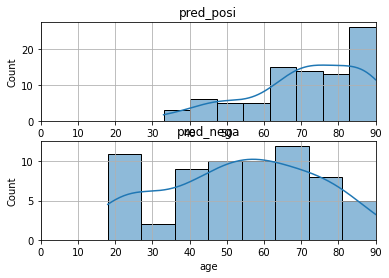

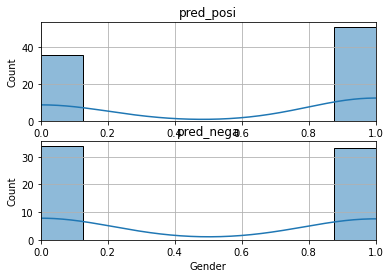

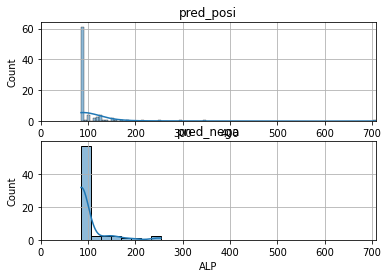

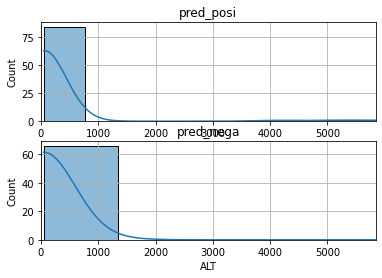

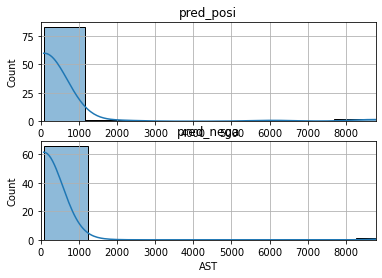

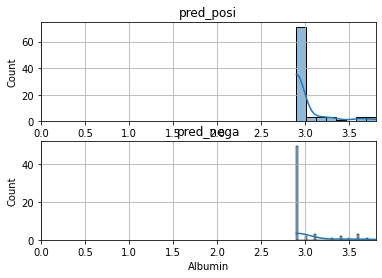

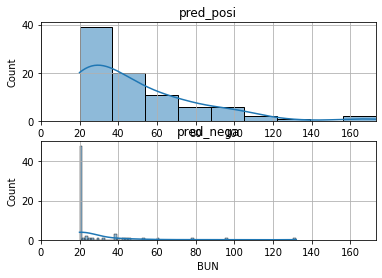

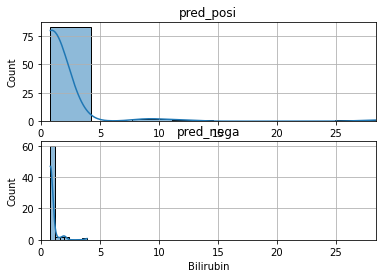

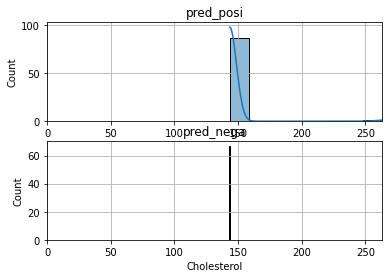

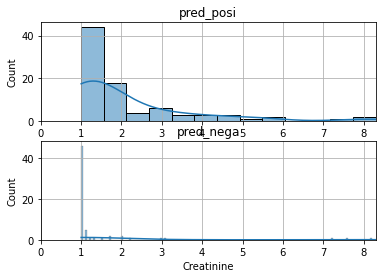

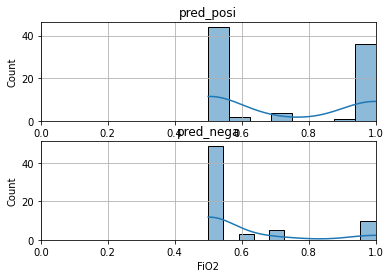

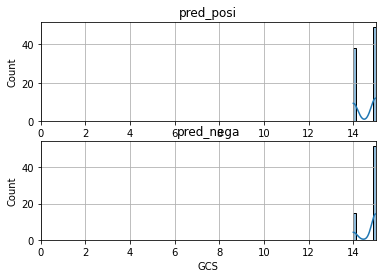

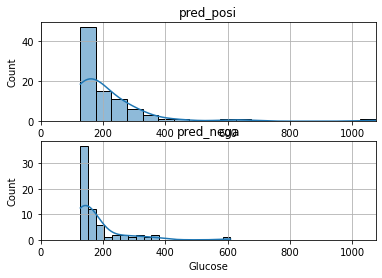

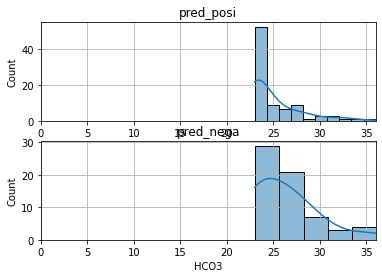

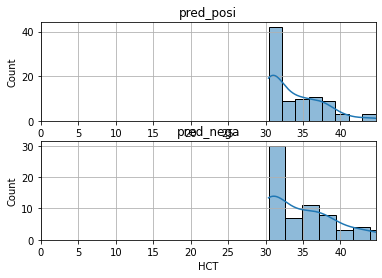

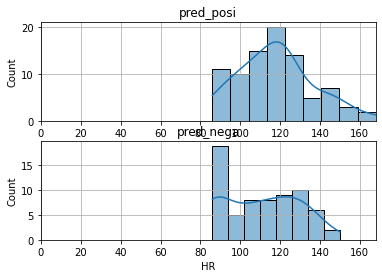

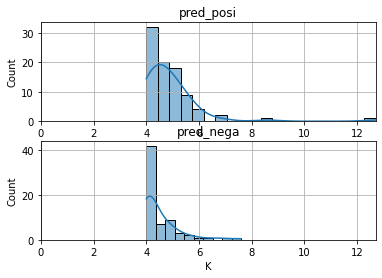

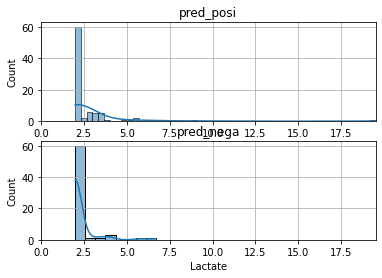

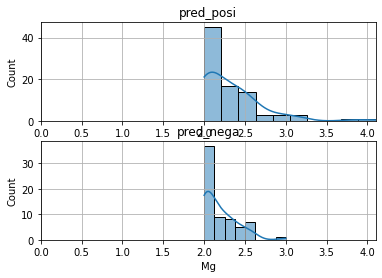

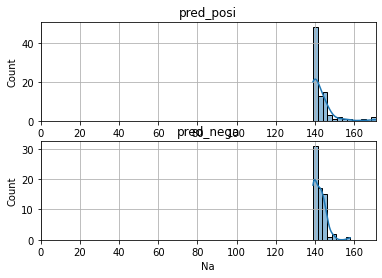

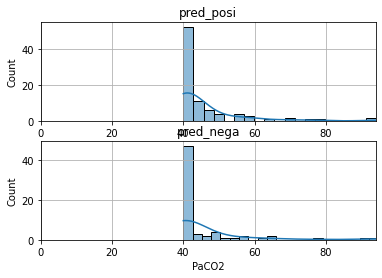

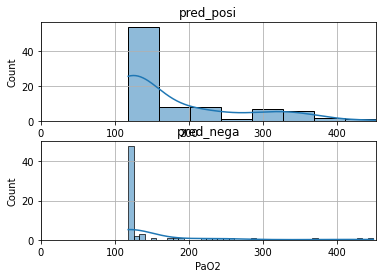

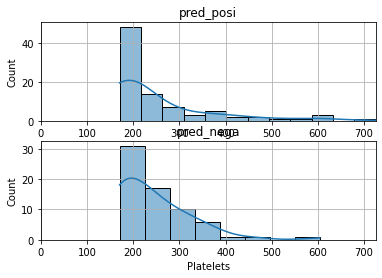

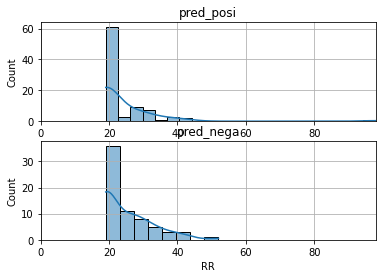

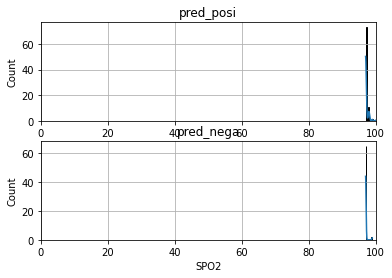

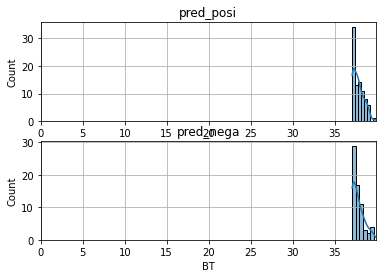

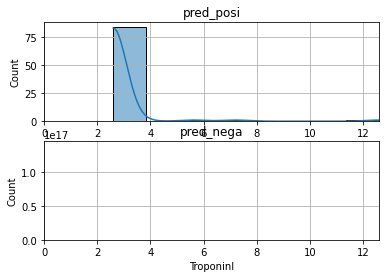

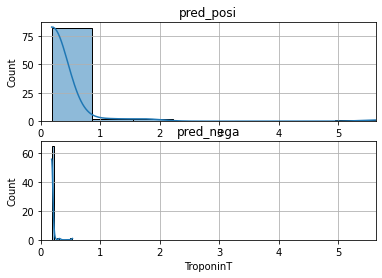

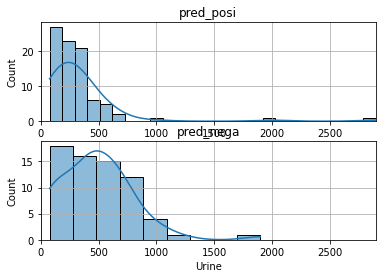

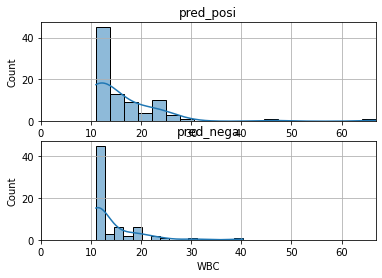

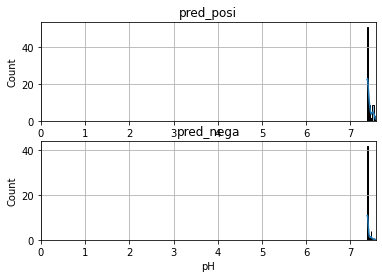

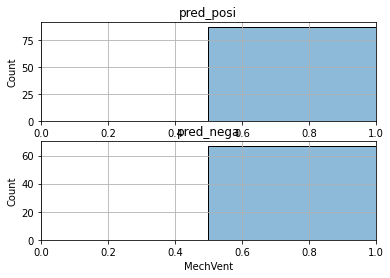

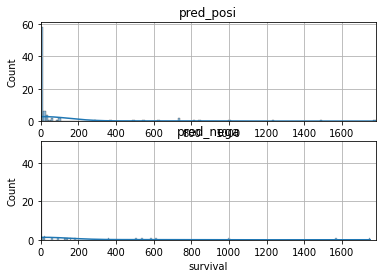

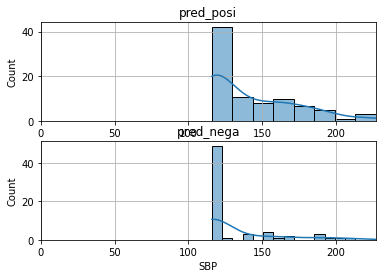

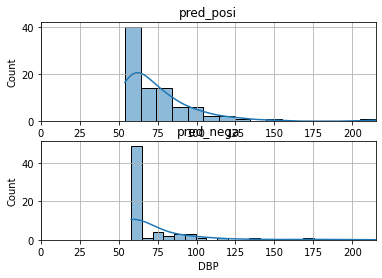

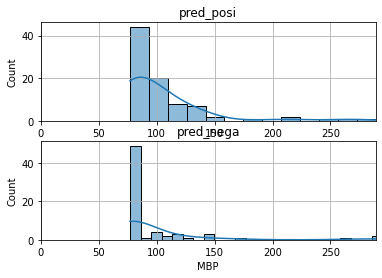

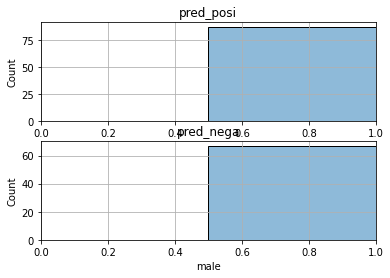

<ipython-input-40-0eb5a54a2924>:23: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[0].set_xlim([0, xlimit])
<ipython-input-40-0eb5a54a2924>:24: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[1].set_xlim([0, xlimit])


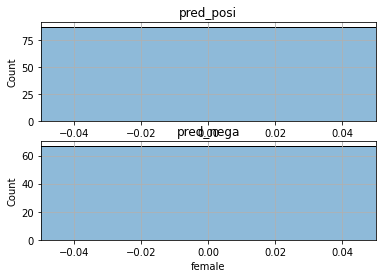

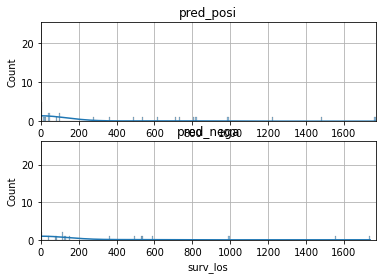

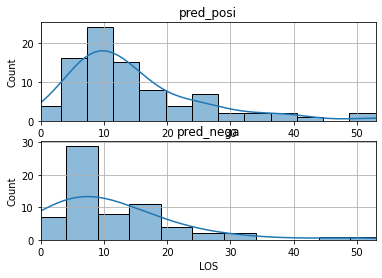

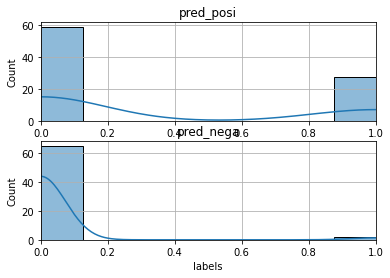

<ipython-input-40-0eb5a54a2924>:23: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[0].set_xlim([0, xlimit])
<ipython-input-40-0eb5a54a2924>:24: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[1].set_xlim([0, xlimit])


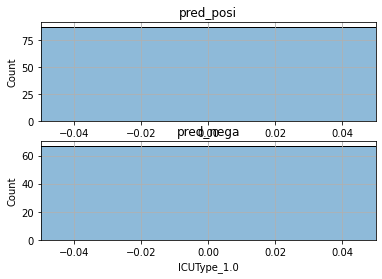

<ipython-input-40-0eb5a54a2924>:23: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[0].set_xlim([0, xlimit])
<ipython-input-40-0eb5a54a2924>:24: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[1].set_xlim([0, xlimit])


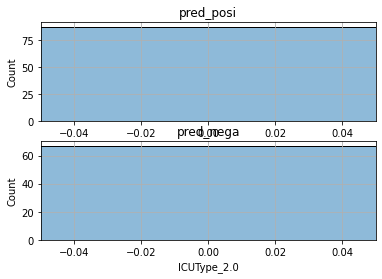

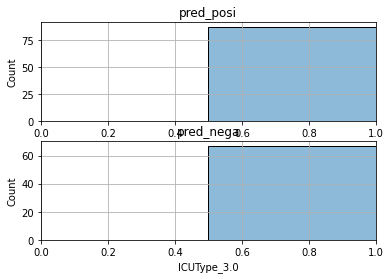

<ipython-input-40-0eb5a54a2924>:23: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[0].set_xlim([0, xlimit])
<ipython-input-40-0eb5a54a2924>:24: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax[1].set_xlim([0, xlimit])


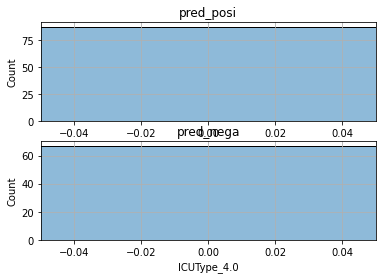

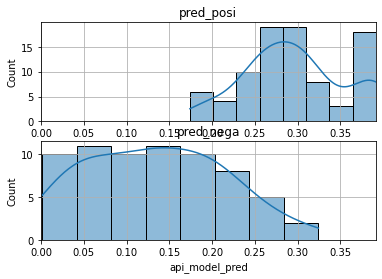

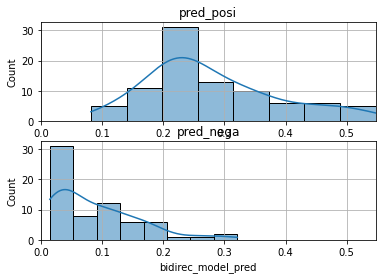

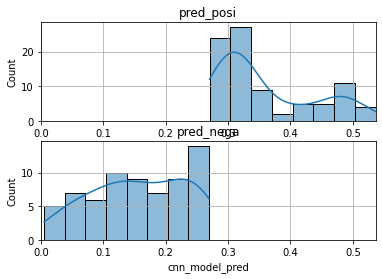

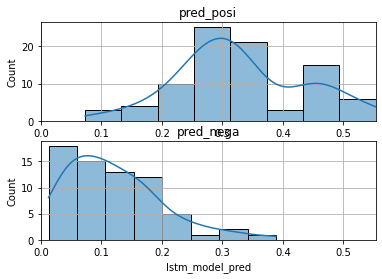

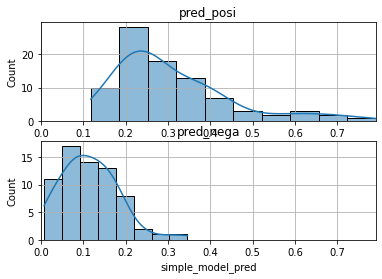

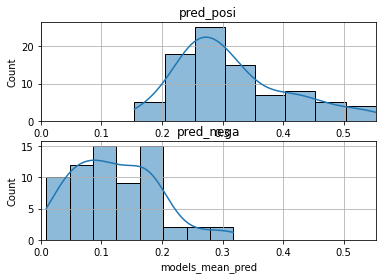

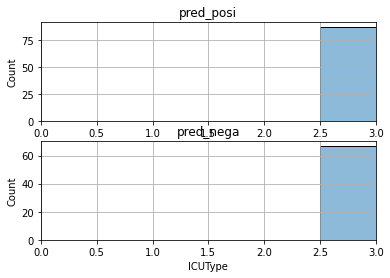

In [ ]:
pred_positive_df = test_df.query('cnn_model_pred>=@cutoff')
pred_negative_df = test_df.query('cnn_model_pred<@cutoff')

icu3_pred_posi_df = test_df.query('cnn_model_pred>=@cutoff and ICUType==3.')
icu3_pred_nega_df = test_df.query('cnn_model_pred<@cutoff and ICUType==3.')

icu3_posi = icu3_pred_posi_df.groupby(by='pid').max()
icu3_nega = icu3_pred_nega_df.groupby(by='pid').max()

print(f'icu3 positive count: {len(icu3_posi)}')
print(f'icu3 negative counts: {len(icu3_nega)}')

for col in icu3_posi.columns:
    fig, ax = plt.subplots(2, 1)
    sns.histplot(icu3_posi[col], ax=ax[0], kde=True)
    ax[0].set_title('pred_posi')
    ax[0].grid()
    sns.histplot(icu3_nega[col], ax=ax[1], kde=True)
    ax[1].set_title('pred_nega')
    ax[1].grid()
    
    xlimit = icu3_posi[col].max()
    ax[0].set_xlim([0, xlimit])
    ax[1].set_xlim([0, xlimit])
    plt.show()


In [ ]:
pred_TPR_df = test_df.query('cnn_model_pred>=@cutoff and labels==1')
pred_FPR_df = test_df.query('cnn_model_pred>=@cutoff and labels==0')

In [ ]:
update